In [1]:
!pip install pandas sklearn seaborn

In [2]:
import pandas
import sklearn
import seaborn as sns

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [115]:
df = pandas.read_csv("./mutations.csv")

In [116]:
df.head(5) # A little overview

,Unnamed: 0,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Section,...,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain
0,803607,02/01/2020,Vente,"268800,00",14.0,RUE,0411,DE L ARCADE,75008.0,BS,...,NaN,NaN,NaN,NaN,NaN,2,2.0,24.0,1.0,NaN
1,803608,06/01/2020,Vente,"878378,00",9.0,BD,5888,DE LA MADELEINE,75001.0,BC,...,NaN,NaN,NaN,NaN,NaN,3,2.0,66.0,2.0,NaN
2,803609,06/01/2020,Vente,"878378,00",9.0,BD,5888,DE LA MADELEINE,75001.0,BC,...,NaN,NaN,NaN,NaN,NaN,1,4.0,43.0,0.0,NaN
3,803610,10/01/2020,Vente,"680000,00",10.0,RUE,1200,DU BOURG L ABBE,75003.0,AV,...,NaN,NaN,NaN,NaN,NaN,1,2.0,51.0,2.0,NaN
4,803611,03/01/2020,Vente,"852000,00",24.0,RUE,8716,DE SAINTONGE,75003.0,AK,...,NaN,NaN,NaN,NaN,NaN,1,2.0,19.0,1.0,NaN


In [117]:
df.describe()

,Unnamed: 0,No voie,Code postal,No plan,No Volume,2eme lot,3eme lot,4eme lot,5eme lot,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain
count,23498.000000,23376.000000,23379.000000,23498.000000,43.000000,8532.000000,1472.000000,592.000000,259.000000,23498.000000,23178.000000,23172.000000,23172.000000,2175.000000
mean,815355.500000,50.986268,75013.162411,49.335263,572.441860,193.831106,119.512908,111.631757,140.243243,1.398119,2.451074,53.957621,1.580615,545.064368
std,6783.432649,142.582907,4.965525,41.930068,3508.186482,699.294044,386.888993,281.376065,342.521598,1.201576,0.693009,247.185729,1.551115,1491.616153
min,803607.000000,1.000000,75001.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,17.000000
25%,809481.250000,11.000000,75010.000000,17.000000,2.000000,22.000000,21.000000,25.000000,31.000000,1.000000,2.000000,11.000000,0.000000,197.000000
50%,815355.500000,28.000000,75015.000000,40.000000,3.000000,47.000000,44.000000,55.000000,74.000000,1.000000,2.000000,32.000000,1.000000,327.000000
75%,821229.750000,66.000000,75017.000000,69.000000,10.000000,99.000000,82.000000,94.000000,105.500000,2.000000,3.000000,60.000000,3.000000,583.000000
max,827104.000000,9001.000000,75020.000000,705.000000,23034.000000,13116.000000,6088.000000,3575.000000,3124.000000,80.000000,4.000000,21603.000000,12.000000,30250.000000


In [118]:
df.dtypes

Unnamed: 0                      int64
Date mutation                  object
Nature mutation                object
Valeur fonciere                object
No voie                       float64
Type de voie                   object
Code voie                      object
Voie                           object
Code postal                   float64
Section                        object
No plan                         int64
No Volume                     float64
1er lot                        object
Surface Carrez du 1er lot      object
2eme lot                      float64
Surface Carrez du 2eme lot     object
3eme lot                      float64
Surface Carrez du 3eme lot     object
4eme lot                      float64
Surface Carrez du 4eme lot     object
5eme lot                      float64
Surface Carrez du 5eme lot     object
Nombre de lots                  int64
Code type local               float64
Surface reelle bati           float64
Nombre pieces principales     float64
Surface terr

# Preprocessing

- Discard the useless columns
- rename the first column to id because it didn't have name
- convert some columns to float because it's a numeric value in a string type

In [119]:
df = df.drop(['Code voie','Voie', 'Section', '1er lot', '2eme lot', '3eme lot','4eme lot','5eme lot'],axis=1, errors='ignore').rename(columns={'Unnamed: 0': "id"})
df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',', '.').apply(float)
df['Surface Carrez du 1er lot'] = df['Surface Carrez du 1er lot'].str.replace(',', '.').apply(float)
df['Surface Carrez du 2eme lot'] = df['Surface Carrez du 2eme lot'].str.replace(',', '.').apply(float)
df['Surface Carrez du 3eme lot'] = df['Surface Carrez du 3eme lot'].str.replace(',', '.').apply(float)
df['Surface Carrez du 4eme lot'] = df['Surface Carrez du 4eme lot'].str.replace(',', '.').apply(float)
df['Surface Carrez du 5eme lot'] = df['Surface Carrez du 5eme lot'].str.replace(',', '.').apply(float)

## Handle nulls
      As we can see in the next cell , there are a lot of missing values in some columns 
      - "No Volume" which isn't important so i'll just discard it
      - "Surface terrain" could be important but i can't use it here because i have a too small sample that aren't null (~9% of total), i'll discard it as well
      - "Surface carrez du 1er lot" is at 57% null but i must have it to get a correct price , so i'll replace the nulls with the mean.
      - About "Surface carrez du 2/3/4/5 lot" i'll simply insert a 0 instead of null
      
      Some value from "Valeur fonciere" are missing which is the target , i'll discard the lines without "Valeur fonciere"

In [120]:
df.isnull().mean() * 100

id                             0.000000
Date mutation                  0.000000
Nature mutation                0.000000
Valeur fonciere                0.182994
No voie                        0.519193
Type de voie                   0.604307
Code postal                    0.506426
No plan                        0.000000
No Volume                     99.817006
Surface Carrez du 1er lot     57.962380
Surface Carrez du 2eme lot    89.182058
Surface Carrez du 3eme lot    98.982892
Surface Carrez du 4eme lot    99.761682
Surface Carrez du 5eme lot    99.885097
Nombre de lots                 0.000000
Code type local                1.361818
Surface reelle bati            1.387352
Nombre pieces principales      1.387352
Surface terrain               90.743893
dtype: float64

In [121]:
df = df.dropna(subset=['Valeur fonciere'])

In [122]:
df = df.drop(['No Volume','Surface terrain'],axis=1, errors='ignore')

In [123]:
df['Surface Carrez du 1er lot'] = df['Surface Carrez du 1er lot'].fillna(df['Surface Carrez du 1er lot'].mean())
df['Surface Carrez du 2eme lot'] = df['Surface Carrez du 2eme lot'].fillna(0)
df['Surface Carrez du 3eme lot'] = df['Surface Carrez du 3eme lot'].fillna(0)
df['Surface Carrez du 4eme lot'] = df['Surface Carrez du 4eme lot'].fillna(0)
df['Surface Carrez du 5eme lot'] = df['Surface Carrez du 5eme lot'].fillna(0)
df = df.fillna(df.mean())

## Let's check the correlations

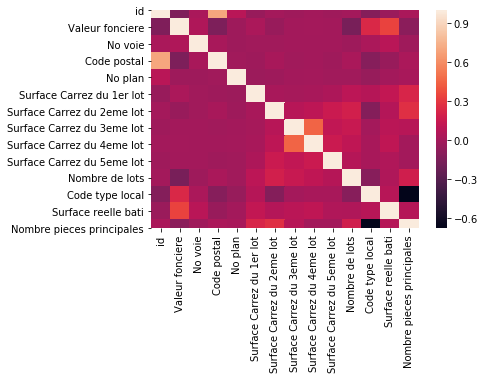

In [124]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

We can see that "surface reelle batiment" is the most correlated values and a little bit the square meters (it would be more if we had less null values i guess) which is pretty logic but we can also see that the amount of property doesn't correlate.

# One hot encoding
   Some values are strings and we need it , but the model can't use non numeric value so we will one hot encode them.
   For date (i don't know if it can have any correlation tho), they are all in 2020 so i'll keep only the month and one hot encode it to not make the model think it's a numeric value that has a quantity
   #### The columns are :
    - Date mutation
    - code postal
    - type de voie
    - nature mutation
   
Some of these columns may be useless , if i realize later that they are , i'll just delete them

In [125]:
df['Date mutation'] = (pandas.to_datetime(df['Date mutation'], format='%d/%m/%Y', errors='coerce')).dt.month

In [126]:
df = pandas.get_dummies(df, columns=['Date mutation', 'Code postal', 'Type de voie','Nature mutation'])

# Predict the price

#### To predict a price we need to use a regression model , for this case i think that a normal regression model is enough (Deep learning would be too much for nothing more for example)

In [127]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

reg = linear_model.LinearRegression()

In [144]:
y = df['Valeur fonciere']
X = df.drop(['Valeur fonciere', 'id'],axis=1)


In [145]:
# We split the data , to keep some for testing after.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, shuffle=True)


In [146]:
reg.fit(X_train, y_train)

LinearRegression()

There are many important parameter to measure to then better fit the model to what we need , it's less true for regression but especially important for classification for example.

In [147]:
reg.score(X_test, y_test) # the Mean squared error

0.31735036502160163

In [148]:
reg.predict(X_test)

array([ 4010649.57491321,  1336177.83238842,   919404.48618768, ...,
        1085408.97132133, 20762087.42825823,  6257769.92873712])

## Final Note

As we can see , we get a pretty bad result of 0.31 

We can try to tweak the model to get a better result but the main problem here is the data we have and especially the nulls , there are way too many nulls .

We can also try to find some arbitrary value to improve the model like square meter / type of house .....

Depending on the real goal of this model we can also try to improve the accuracy of the data for example here we use the square meter of the property but maybe the price is about the livable square meter ...